**Data Preprocessing - Audio**

In [ ]:
#Import the necessary libraries
import librosa
import soundfile as sf
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
SAMPLE_RATE = 16000
RAW_DIR = "drive/MyDrive/Group22_Audio/audio_raw"
AUG_DIR = "drive/MyDrive/Group22_Audio/audio_augmented"

files = [f for f in os.listdir(RAW_DIR) if f.endswith(".wav")]

**Preprocess & Visualize**

For each sample:

Resample to 16 kHz (if needed)

Convert stereo → mono

Optionally trim leading/trailing silence

Plot waveform + spectrogram and briefly interpret.

/tmp/ipython-input-1461504076.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SAMPLE_RATE)  # mono, resampled
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


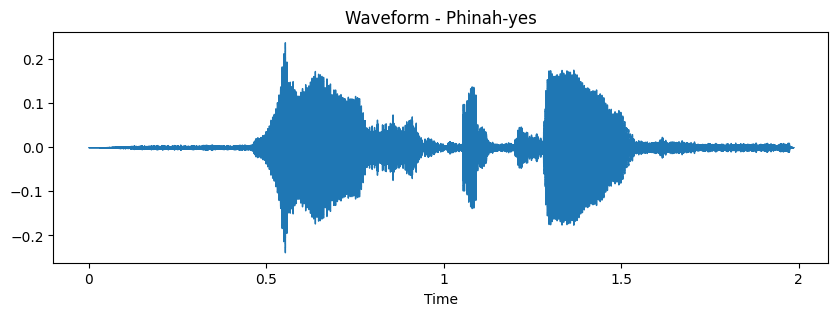

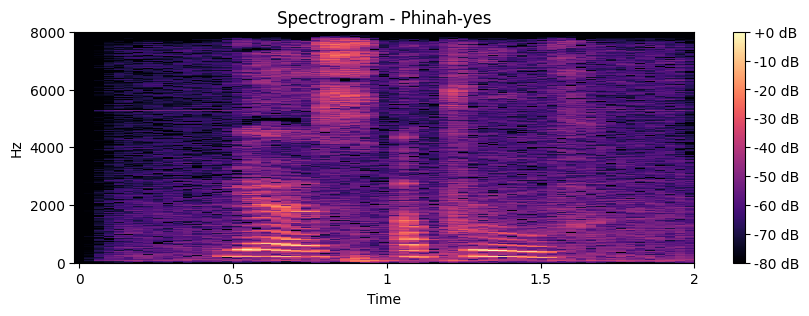

In [ ]:
#Sample 1: Phinah-yes

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

file_path = os.path.join(RAW_DIR, "Phinah-yes.wav")
y, sr = librosa.load(file_path, sr=SAMPLE_RATE)  # mono, resampled

# Waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform - Phinah-yes")
plt.show()

# Spectrogram
D = np.abs(librosa.stft(y))
S_db = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(10, 3))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram - Phinah-yes")
plt.show()


/tmp/ipython-input-2345410681.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SAMPLE_RATE)  # mono, resampled
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


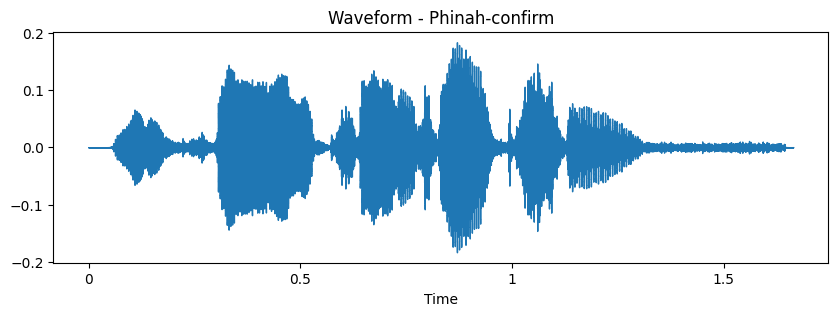

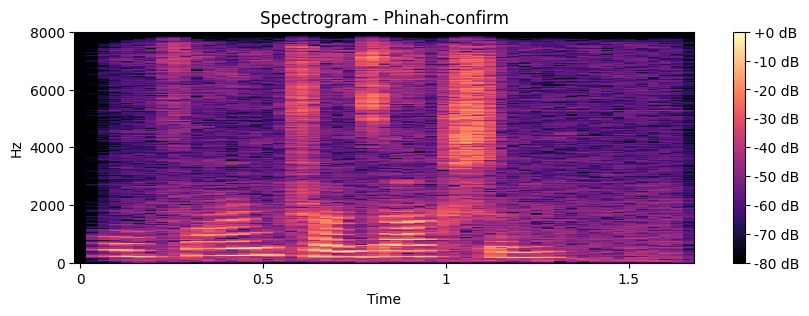

In [ ]:
#Sample 2: Phinah-Confirm

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

file_path = os.path.join(RAW_DIR, "Phinah-confirm.wav")
y, sr = librosa.load(file_path, sr=SAMPLE_RATE)  # mono, resampled

# Waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform - Phinah-confirm")
plt.show()

# Spectrogram
D = np.abs(librosa.stft(y))
S_db = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(10, 3))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram - Phinah-confirm")
plt.show()


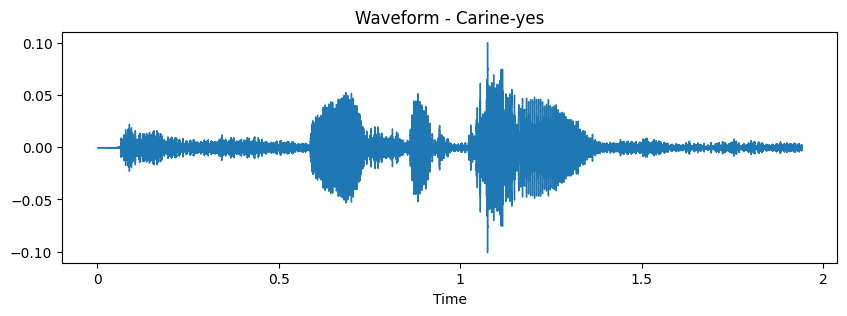

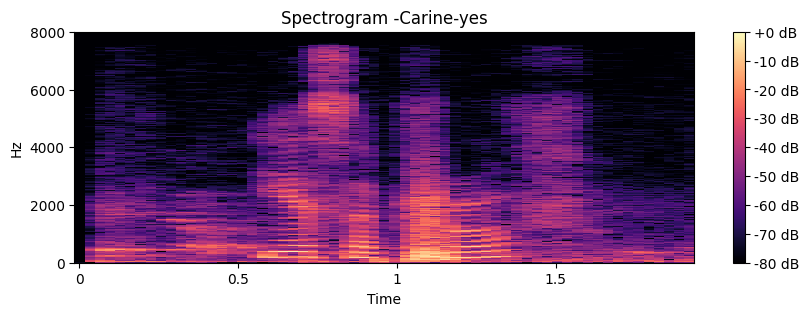

In [ ]:
# Sample 3 :

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

file_path = os.path.join(RAW_DIR, "Carine_yes.wav")
y, sr = librosa.load(file_path, sr=SAMPLE_RATE)  # mono, resampled

# Waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform - Carine-yes")
plt.show()

# Spectrogram
D = np.abs(librosa.stft(y))
S_db = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(10, 3))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram -Carine-yes")
plt.show()


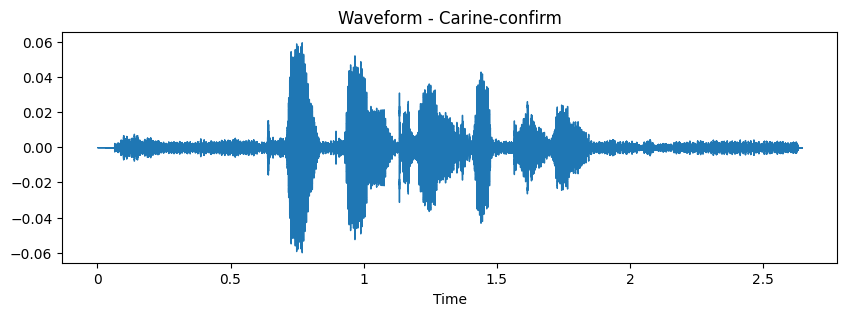

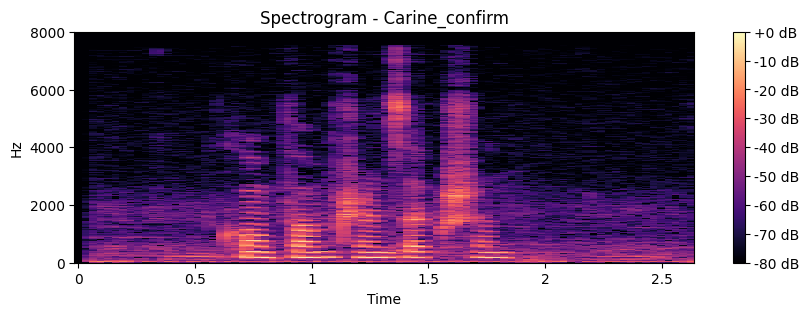

In [ ]:
# Sample 4:

import matplotlib.pyplot as plt
import librosa.display
import numpy as np

file_path = os.path.join(RAW_DIR, "Carine_confirm.wav")
y, sr = librosa.load(file_path, sr=SAMPLE_RATE)  # mono, resampled

# Waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform - Carine-confirm")
plt.show()

# Spectrogram
D = np.abs(librosa.stft(y))
S_db = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(10, 3))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram - Carine_confirm")
plt.show()


 **Audio Augmentation**

Pitch shift (up/down a few semitones)

Time stretch (slightly faster/slower)

Add background noise (random Gaussian, or noise from another clip)

In [ ]:
import numpy as np

def augment_pitch(y, sr, n_steps):
    return librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps)

def augment_time_stretch(y, rate):
    return librosa.effects.time_stretch(y, rate=rate)

def augment_noise(y, noise_factor=0.005):
    noise = np.random.randn(len(y))
    return y + noise_factor * noise


In [ ]:
AUG_DIR = "drive/MyDrive/Group22_Audio/audio_augmented"
os.makedirs(AUG_DIR, exist_ok=True)

def save_wav(y, sr, out_path):
    sf.write(out_path, y, sr)

for fname in files:
    path = os.path.join(RAW_DIR, fname)
    y, sr = librosa.load(path, sr=SAMPLE_RATE)

    # 1) Pitch up
    y_pitch = augment_pitch(y, sr, n_steps=2)
    save_wav(y_pitch, sr, os.path.join(AUG_DIR, fname.replace(".wav", "_pitchup.wav")))

    # 2) Time stretch
    y_stretch = augment_time_stretch(y, rate=1.1)
    save_wav(y_stretch, sr, os.path.join(AUG_DIR, fname.replace(".wav", "_fast.wav")))

    # 3) Noise (optional extra)
    y_noise = augment_noise(y)
    save_wav(y_noise, sr, os.path.join(AUG_DIR, fname.replace(".wav", "_noise.wav")))


/tmp/ipython-input-3745470125.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path, sr=SAMPLE_RATE)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-3745470125.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path, sr=SAMPLE_RATE)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


**Feature Extraction → audio_features.csv**

The rubric wants things like:

MFCCs

Spectral roll-off

Energy (e.g. RMS)

Typical approach: compute each feature over frames, then take summary statistics (mean, std).

Design your CSV columns, for example:

file_name

user_id (e.g. phinah, teammate, unauth)

phrase (yes_approve, confirm)

authorized (1/0)

Numeric feature columns: mfcc_1_mean, …, mfcc_13_std, rolloff_mean, rms_mean, etc.

In [ ]:
# Extraction function:

import pandas as pd

def extract_features(y, sr):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = mfcc.mean(axis=1)
    mfcc_std = mfcc.std(axis=1)

    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_mean = rolloff.mean()

    rms = librosa.feature.rms(y=y)
    rms_mean = rms.mean()

    feats = {}
    for i, (m, s) in enumerate(zip(mfcc_mean, mfcc_std), start=1):
        feats[f"mfcc_{i}_mean"] = m
        feats[f"mfcc_{i}_std"] = s
    feats["rolloff_mean"] = rolloff_mean
    feats["rms_mean"] = rms_mean

    return feats


In [ ]:
import warnings

# Loop all raw + augmented files:
fname = "audio-features.csv"
def parse_meta(fname):
    base = fname.replace(".wav", "")
    parts = base.split("_")

    # If filename does not follow expected pattern
    if len(parts) < 2:
        # Set defaults or skip unauthorized
        user_id = parts[0] if len(parts) >= 1 else "unknown"
        phrase = "unknown"
        authorized = 0 if user_id.lower() == "unauth" else 1
    else:
        user_id = parts[0]
        phrase = parts[1]
        authorized = 0 if user_id.lower() == "unauth" else 1

    return user_id, phrase, authorized

rows = []

warnings.filterwarnings("ignore")

for subdir in [RAW_DIR, AUG_DIR]:
    if not os.path.exists(subdir):
        continue
    for fname in os.listdir(subdir):
        if not fname.endswith(".wav"):
            continue
        fpath = os.path.join(subdir, fname)
        try:
            y, sr = librosa.load(fpath, sr=SAMPLE_RATE)
        except Exception as e:
            print(f"Error loading {fname}: {e}")
            continue
        feats = extract_features(y, sr)
        user_id, phrase, authorized = parse_meta(fname)
        row = {
            "file_name": fname,
            "user_id": user_id,
            "phrase": phrase,
            "authorized": authorized,
        }
        row.update(feats)
        rows.append(row)

df_audio = pd.DataFrame(rows)
df_audio.to_csv("/content/drive/MyDrive/Group22_Audio/audio_features.csv", index=False)
df_audio.head()

,file_name,user_id,phrase,authorized,mfcc_1_mean,mfcc_1_std,mfcc_2_mean,mfcc_2_std,mfcc_3_mean,mfcc_3_std,...,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,rolloff_mean,rms_mean
0,Phinah-confirm.wav,Phinah-confirm,unknown,1,-307.748779,98.085213,63.549168,45.935886,8.424397,21.951078,...,-3.679141,7.103075,-8.796052,6.183372,0.258100,6.188399,-1.359016,4.684324,4368.956368,0.026762
1,Phinah-yes.wav,Phinah-yes,unknown,1,-332.141327,94.094795,58.629177,28.972687,3.844157,23.498405,...,-3.022403,8.036007,-3.741779,5.255671,1.765953,6.009571,0.351623,6.036438,4815.352183,0.024112
2,Carine_confirm.wav,Carine,confirm,1,-529.761047,91.705528,131.595093,40.268948,-14.580715,31.838160,...,5.533759,10.651873,4.814101,6.247823,1.255356,7.903593,2.748198,6.959244,1986.916416,0.005206
3,Carine_yes.wav,Carine,yes,1,-465.100525,100.578659,135.155579,48.189934,-16.204393,23.619761,...,0.276158,7.903832,6.990488,10.499877,5.145983,11.531322,1.884618,7.614949,2247.822746,0.008223
4,Phinah-confirm_pitchup.wav,Phinah-confirm,pitchup,1,-332.746399,92.608269,62.792706,40.572132,2.437251,23.937973,...,-2.447517,6.289815,-3.729036,9.424119,4.777756,5.318863,-4.133570,4.354955,4487.470519,0.018412


**Train the Voiceprint Verification Model**

Goal: Given audio features, predict whether the voice is from an authorized user (or which user).

Binary classification authorized (1) vs unauthorized (0).

Use models mentioned: Logistic Regression, Random Forest, or XGBoost.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

X = df_audio.drop(columns=["file_name", "user_id", "phrase", "authorized"])
y = df_audio["authorized"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model = Pipeline([
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
F1: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [ ]:
# save the model
import joblib
joblib.dump(model, "/content/drive/MyDrive/Group22_Audio/models/voice_verification.pkl")


['/content/drive/MyDrive/Group22_Audio/models/voice_verification.pkl']

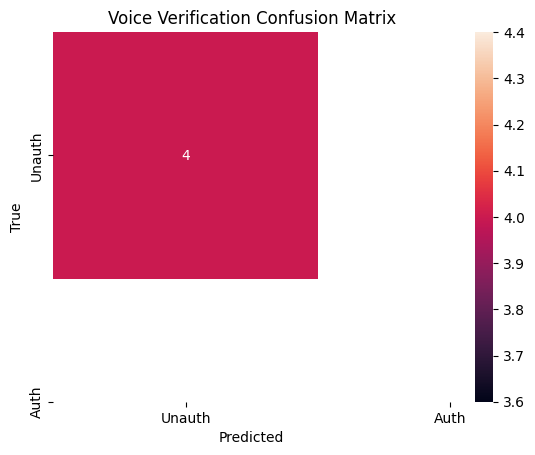

In [ ]:
# Evaluation
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Unauth", "Auth"], yticklabels=["Unauth", "Auth"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Voice Verification Confusion Matrix")
plt.show()


In [ ]:
def predict_voice(file_path, model_path="models/voice_verification.pkl"):
    model = joblib.load(model_path)
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    feats = extract_features(y, sr)
    X = pd.DataFrame([feats])
    prob = model.predict_proba(X)[0, 1]
    pred = model.predict(X)[0]
    print(f"Predicted authorized: {bool(pred)} (prob={prob:.2f})")
    return pred, prob
